In [30]:
import pandas as pd

In [103]:
file_name = 'user_behavior_dataset.csv'
# url = '/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv'
df = pd.read_csv(file_name)

In [33]:
df.shape

(700, 11)

In [105]:
df.iloc[10:20, :]

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
10,11,Google Pixel 5,Android,53,1.40,435,17,162,34,Female,1
11,12,OnePlus 9,Android,215,5.50,1690,47,641,24,Male,3
12,13,OnePlus 9,Android,462,6.20,2303,65,1099,57,Female,4
13,14,Xiaomi Mi 11,Android,215,4.90,1662,43,857,43,Male,3
14,15,iPhone 12,iOS,189,5.40,1754,53,779,49,Female,3
15,16,Google Pixel 5,Android,503,10.40,2571,84,2025,39,Female,5
16,17,OnePlus 9,Android,132,3.60,628,32,344,47,Female,2
17,18,iPhone 12,iOS,299,5.80,1431,41,985,44,Female,3
18,19,Google Pixel 5,Android,81,1.40,558,16,297,26,Female,1
19,20,iPhone 12,iOS,577,8.50,2774,89,2192,29,Female,5


In [92]:
df = df.drop(columns=["User ID"], axis=1)

In [90]:
df.describe()

,app_usage_time,screen_on_time(h/day),battery_drain,num_of_installed_apps,data_usage(mb/day),age,gender,user_behavior_class
count,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00
mean,271.13,5.27,1525.16,50.68,929.74,38.48,0.52,2.99
std,177.20,3.07,819.14,26.94,640.45,12.01,0.50,1.40
min,30.00,1.00,302.00,10.00,102.00,18.00,0.00,1.00
25%,113.25,2.50,722.25,26.00,373.00,28.00,0.00,2.00
50%,227.50,4.90,1502.50,49.00,823.50,38.00,1.00,3.00
75%,434.25,7.40,2229.50,74.00,1341.00,49.00,1.00,4.00
max,598.00,12.00,2993.00,99.00,2497.00,59.00,1.00,5.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Device Model                700 non-null    object 
 1   Operating System            700 non-null    object 
 2   App Usage Time (min/day)    700 non-null    int64  
 3   Screen On Time (hours/day)  700 non-null    float64
 4   Battery Drain (mAh/day)     700 non-null    int64  
 5   Number of Apps Installed    700 non-null    int64  
 6   Data Usage (MB/day)         700 non-null    int64  
 7   Age                         700 non-null    int64  
 8   Gender                      700 non-null    object 
 9   User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 54.8+ KB


In [93]:
new_cols = {
"Device Model" : "device_model",
"Operating System" : "operating_system",
"App Usage Time (min/day)" : "app_usage_time",
"Screen On Time (hours/day)" : "screen_on_time(h/day)",
"Battery Drain (mAh/day)" : "battery_drain",
"Number of Apps Installed" : "num_of_installed_apps",
"Data Usage (MB/day)" : "data_usage(mb/day)",
"Age" :  "age",
"Gender" : "gender",
"User Behavior Class" : "user_behavior_class" }



df.rename(columns=new_cols, inplace=True)

In [40]:
def count_categorical_numerical_columns( dataframe, cat_th = 10 , car_th = 20 ) :

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ['object' , 'category' , 'bool']]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["int64", "float64"]]

    cat_but_car = [col for col in dataframe.columns if

                   dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category", "object"]]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [41]:
cat_cols, num_cols, cat_but_car = count_categorical_numerical_columns(df)

Observations: 700
Variables: 10
cat_cols: 4
num_cols: 6
cat_but_car: 0
num_but_cat: 1


In [44]:
def feature_analysis(df , type = "numerical"):

    if (type == "numerical") :

        df_numeric = df.select_dtypes(include=['int64', 'float64'])
        summ = pd.DataFrame(df_numeric.dtypes, columns=['data type'])



        desc = df_numeric.describe().transpose() # getting the stats
        summ['#missing'] = df_numeric.isnull().sum().values
        summ['#duplicate'] = df_numeric.duplicated().sum()

        summ['min'] = desc['min'].values
        summ['max'] = desc['max'].values
        summ['mean'] = desc['mean'].values
        summ["median"] = desc["50%"].values
        summ['std dev'] = desc['std'].values

    elif (type == "categorical") :

        df_categoric = df.select_dtypes(include = ['O'])
        summ = pd.DataFrame(df_categoric.dtypes, columns=['data type'])
        summ['#missing'] = df_categoric.isnull().sum().values
        summ['#duplicate'] = df_categoric.duplicated().sum()

        desc_cat = df_categoric.describe().transpose()
        summ['count'] = desc_cat['count'].values
        summ['unique'] = desc_cat['unique'].values
        summ['top'] = desc_cat['top'].values
        summ['freq'] = desc_cat['freq'].values
        summ["percentage_of_top"] = (summ['freq'] / summ['count']) *100

    return summ

In [45]:
feature_analysis(df)

,data type,#missing,#duplicate,min,max,mean,median,std dev
app_usage_time,int64,0,0,30.00,598.00,271.13,227.50,177.20
screen_on_time(h/day),float64,0,0,1.00,12.00,5.27,4.90,3.07
battery_drain,int64,0,0,302.00,2993.00,1525.16,1502.50,819.14
num_of_installed_apps,int64,0,0,10.00,99.00,50.68,49.00,26.94
data_usage(mb/day),int64,0,0,102.00,2497.00,929.74,823.50,640.45
age,int64,0,0,18.00,59.00,38.48,38.00,12.01
user_behavior_class,int64,0,0,1.00,5.00,2.99,3.00,1.40


from matplotlib import pyplot as plt
_df_11['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['max'].plot(kind='hist', bins=20, title='max')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['median'].plot(kind='hist', bins=20, title='median')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_15.groupby('data type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='min', y='max', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='max', y='mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='mean', y='median', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='median', y='std dev', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['#missing']
  ys = series['min']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_20.sort_values('#missing', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('data type')):
  _plot_series(series, series_name, i)
  fig.legend(title='data type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('#missing')
_ = plt.ylabel('min')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['#missing']
  ys = series['max']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('#missing', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('data type')):
  _plot_series(series, series_name, i)
  fig.legend(title='data type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('#missing')
_ = plt.ylabel('max')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['#missing']
  ys = series['mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('#missing', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('data type')):
  _plot_series(series, series_name, i)
  fig.legend(title='data type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('#missing')
_ = plt.ylabel('mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['#missing']
  ys = series['median']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('#missing', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('data type')):
  _plot_series(series, series_name, i)
  fig.legend(title='data type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('#missing')
_ = plt.ylabel('median')

from matplotlib import pyplot as plt
_df_24['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_25['max'].plot(kind='line', figsize=(8, 4), title='max')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['median'].plot(kind='line', figsize=(8, 4), title='median')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_28['data type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_28, x='min', y='data type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_29['data type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_29, x='max', y='data type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_30['data type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_30, x='mean', y='data type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_31['data type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_31, x='median', y='data type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [53]:
feature_analysis(df, 'categorical')

,data type,#missing,#duplicate,count,unique,top,freq,percentage_of_top
device_model,object,0,690,700,5,Xiaomi Mi 11,146,20.86
operating_system,object,0,690,700,2,Android,554,79.14
gender,object,0,690,700,2,Male,364,52.00


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('unique').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('top').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('freq').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('percentage_of_top').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['#missing']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': '#missing'}, axis=1)
              .sort_values('#missing', ascending=True))
  xs = counted['#missing']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('#missing', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('unique')):
  _plot_series(series, series_name, i)
  fig.legend(title='unique', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('#missing')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['#missing']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': '#missing'}, axis=1)
              .sort_values('#missing', ascending=True))
  xs = counted['#missing']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('#missing', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('top')):
  _plot_series(series, series_name, i)
  fig.legend(title='top', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('#missing')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['#missing']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': '#missing'}, axis=1)
              .sort_values('#missing', ascending=True))
  xs = counted['#missing']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('#missing', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('freq')):
  _plot_series(series, series_name, i)
  fig.legend(title='freq', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('#missing')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['#missing']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': '#missing'}, axis=1)
              .sort_values('#missing', ascending=True))
  xs = counted['#missing']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('#missing', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('percentage_of_top')):
  _plot_series(series, series_name, i)
  fig.legend(title='percentage_of_top', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('#missing')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['top'].value_counts()
    for x_label, grp in _df_8.groupby('unique')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('unique')
_ = plt.ylabel('top')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['freq'].value_counts()
    for x_label, grp in _df_9.groupby('top')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('top')
_ = plt.ylabel('freq')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['percentage_of_top'].value_counts()
    for x_label, grp in _df_10.groupby('freq')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('freq')
_ = plt.ylabel('percentage_of_top')

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



import warnings

warnings.filterwarnings(action = "ignore")
pd.set_option("display.max_columns" , 200)
pd.options.display.float_format = '{:.2f}'.format

In [48]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots



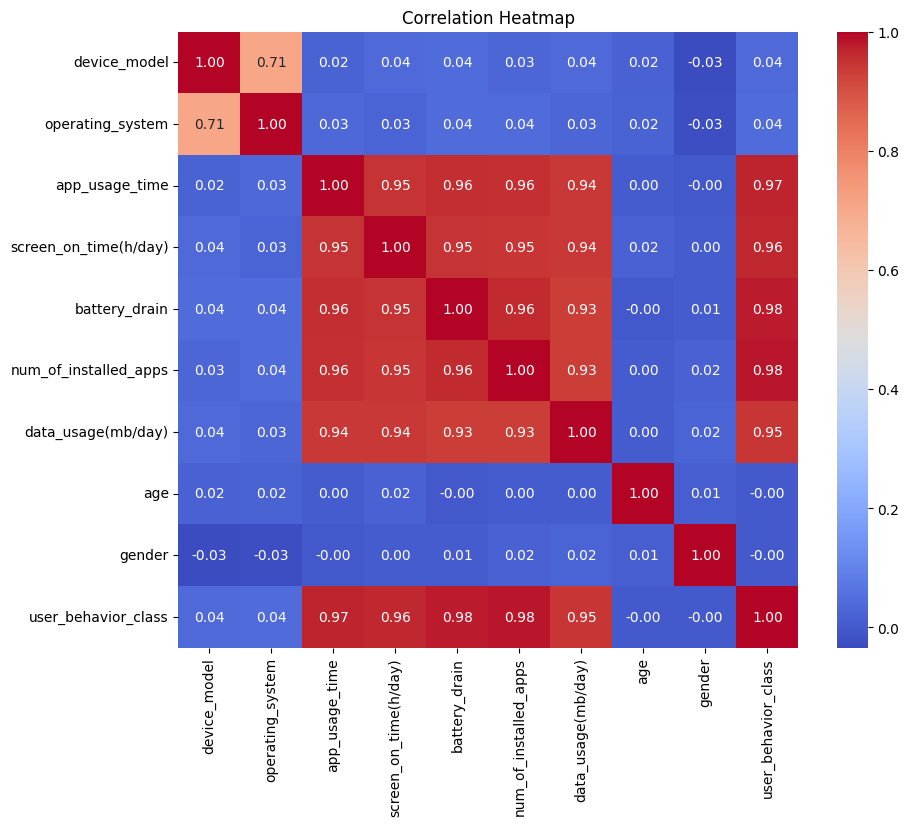

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

# Function to calculate Cramér's V for categorical-categorical correlation
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Function to calculate correlation ratio (η²) for numerical-categorical correlation
def correlation_ratio(categories, values):
    f_cat, _ = pd.factorize(categories)
    cat_means = [values[f_cat == i].mean() for i in np.unique(f_cat)]
    overall_mean = values.mean()
    numerator = np.sum([len(values[f_cat == i]) * (mean - overall_mean) ** 2 for i, mean in enumerate(cat_means)])
    denominator = np.sum((values - overall_mean) ** 2)
    return numerator / denominator if denominator != 0 else 0

data = df
# Encode categorical features for numerical analysis
label_encoders = {col: LabelEncoder() for col in data.select_dtypes(include='object')}
for col, le in label_encoders.items():
    data[col] = le.fit_transform(data[col])

# Compute correlation matrix
corr_matrix = pd.DataFrame(index=data.columns, columns=data.columns)
for col1 in data.columns:
    for col2 in data.columns:
        if col1 == col2:
            corr_matrix.loc[col1, col2] = 1.0
        elif data[col1].dtype == 'object' and data[col2].dtype == 'object':
            confusion_matrix = pd.crosstab(data[col1], data[col2]).to_numpy()
            corr_matrix.loc[col1, col2] = cramers_v(confusion_matrix)
        elif data[col1].dtype == 'object' or data[col2].dtype == 'object':
            corr_matrix.loc[col1, col2] = correlation_ratio(data[col1], data[col2])
        else:
            corr_matrix.loc[col1, col2] = data[col1].corr(data[col2])

corr_matrix = corr_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Heatmap')
plt.show()

                 Feature  Correlation_with_Target
0           device_model                     0.04
1       operating_system                     0.04
2         app_usage_time                     0.97
3  screen_on_time(h/day)                     0.96
4          battery_drain                     0.98
5  num_of_installed_apps                     0.98
6     data_usage(mb/day)                     0.95
7                    age                    -0.00
8                 gender                    -0.00


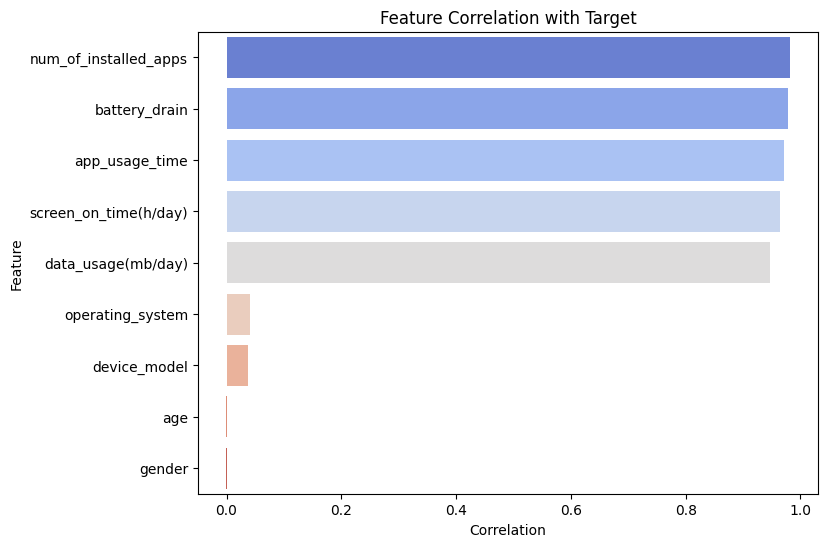

In [58]:

# Define target column
target_col = 'user_behavior_class'

# Compute correlation with the target column
correlations = {}
for col in data.columns:
    if col == target_col:
        continue
    if data[col].dtype == 'object' and data[target_col].dtype == 'object':
        confusion_matrix = pd.crosstab(data[col], data[target_col]).to_numpy()
        correlations[col] = cramers_v(confusion_matrix)
    elif data[col].dtype == 'object' or data[target_col].dtype == 'object':
        correlations[col] = correlation_ratio(data[col], data[target_col])
    else:
        correlations[col] = data[col].corr(data[target_col])

# Display results
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation_with_Target'])
print(correlation_df)

# Optional: Plot the correlations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(x='Correlation_with_Target', y='Feature', data=correlation_df.sort_values(by='Correlation_with_Target', ascending=False), palette='coolwarm')
plt.title('Feature Correlation with Target')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.show()


In [80]:
# dropping the columns which are less co-related to target column

# df = df.drop(['device_model', 'operating_system'], axis=1)

In [59]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range

    return low_limit, up_limit



def check_outlier(dataframe, col_name, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True

    else:
        return False


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [60]:
for column in num_cols:
    # Plot boxplot if there are outliers
    if check_outlier(df,column) :

        fig = px.box(df, y=column, title=f'Boxplot of {column} with Outliers')
        fig.show()



    else:
        print(f"{column} has : no outliers\n")

app_usage_time has : no outliers

screen_on_time(h/day) has : no outliers

battery_drain has : no outliers

num_of_installed_apps has : no outliers

data_usage(mb/day) has : no outliers

age has : no outliers



In [94]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import RandomizedSearchCV

In [95]:
X = df.drop(columns = ["user_behavior_class"] , axis = 1)
y = df["user_behavior_class"]

In [97]:
cat_cols = X.select_dtypes(include=['object']).columns.values
num_cols = X.select_dtypes(include=np.number).columns.tolist()

In [98]:
# Data Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ])


In [99]:
# Models

classifiers = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=200),
    'SVM': SVC(),
    'DecisionTree': DecisionTreeClassifier(),
    'KNeighbors': KNeighborsClassifier()}


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42, stratify=y)


In [101]:
scores = {'accuracy': {}, 'precision': {}, 'recall': {}, 'f1-score': {}}

for name, clf in classifiers.items():
    model = Pipeline(
        steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Test
    report = classification_report(y_test, y_pred, output_dict=True)
    scores['accuracy'][name] = accuracy_score(y_test, y_pred)
    scores['precision'][name] = report['macro avg']['precision']
    scores['recall'][name] = report['macro avg']['recall']
    scores['f1-score'][name] = report['macro avg']['f1-score']

In [102]:
scores

{'accuracy': {'RandomForest': 1.0,
  'LogisticRegression': 0.9976190476190476,
  'SVM': 1.0,
  'DecisionTree': 1.0,
  'KNeighbors': 0.9642857142857143},
 'precision': {'RandomForest': 1.0,
  'LogisticRegression': 0.997752808988764,
  'SVM': 1.0,
  'DecisionTree': 1.0,
  'KNeighbors': 0.9652683967860869},
 'recall': {'RandomForest': 1.0,
  'LogisticRegression': 0.9976744186046511,
  'SVM': 1.0,
  'DecisionTree': 1.0,
  'KNeighbors': 0.9651441117432139},
 'f1-score': {'RandomForest': 1.0,
  'LogisticRegression': 0.9977004658539002,
  'SVM': 1.0,
  'DecisionTree': 1.0,
  'KNeighbors': 0.9645863720908171}}